In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-class-balanced/balanced_data.csv


In [2]:
import pickle

In [3]:
df =pd.read_csv("../input/twitter-class-balanced/balanced_data.csv") 

In [4]:
df.describe()

,Unnamed: 0,class
count,142184.000000,142184.000000
mean,71091.500000,4.000000
std,41045.129675,2.000007
min,0.000000,1.000000
25%,35545.750000,2.000000
50%,71091.500000,4.000000
75%,106637.250000,6.000000
max,142183.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142184 entries, 0 to 142183
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  142184 non-null  int64 
 1   text        142184 non-null  object
 2   class       142184 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ MB


In [6]:
corpus = df.text.to_list()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [8]:
len(v.vocabulary_)

52625

In [9]:
print(transform_output.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
df['class'].value_counts()

1    20312
2    20312
3    20312
4    20312
5    20312
6    20312
7    20312
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df['class'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df['class']
)

In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (113747,)
Shape of X_test:  (28437,)


In [13]:
X_train.head()

19816     eh it all good i have so many new amazing frie...
61230     my friend lil brother said i m kinda like a br...
19000     it s the way they switched up when dream joine...
121156    you def look different . if not physically the...
88860     hayes belief the blues can reach another level...
Name: text, dtype: object

In [14]:
y_train.value_counts()

4    16250
3    16250
7    16250
2    16250
1    16249
6    16249
5    16249
Name: class, dtype: int64

In [15]:
y_test.value_counts()

6    4063
1    4063
5    4063
2    4062
4    4062
3    4062
7    4062
Name: class, dtype: int64

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
filename = 'KNN.sav'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           1       0.11      0.00      0.00      4063
           2       0.69      0.07      0.12      4062
           3       0.47      0.01      0.01      4062
           4       0.26      0.00      0.01      4062
           5       0.40      0.02      0.04      4063
           6       0.14      0.98      0.25      4063
           7       0.33      0.00      0.00      4062

    accuracy                           0.15     28437
   macro avg       0.34      0.15      0.06     28437
weighted avg       0.34      0.15      0.06     28437



In [17]:
X_test[:2]

36760     i seriously appreciate when you guy interact w...
104321          it s been a minute yea let it stay that way
Name: text, dtype: object

In [18]:
y_test[:2]

36760     2
104321    6
Name: class, dtype: int64

In [19]:
y_pred[:2]

array([6, 6])

In [20]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

filename = 'NaiveBayes.sav'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           1       0.24      0.19      0.21      4063
           2       0.44      0.55      0.49      4062
           3       0.30      0.37      0.33      4062
           4       0.27      0.33      0.30      4062
           5       0.33      0.28      0.31      4063
           6       0.25      0.19      0.22      4063
           7       0.26      0.25      0.25      4062

    accuracy                           0.31     28437
   macro avg       0.30      0.31      0.30     28437
weighted avg       0.30      0.31      0.30     28437



In [21]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

filename = 'RandomForest.sav'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           1       0.21      0.18      0.19      4063
           2       0.41      0.55      0.47      4062
           3       0.27      0.32      0.29      4062
           4       0.25      0.27      0.26      4062
           5       0.29      0.28      0.29      4063
           6       0.25      0.16      0.20      4063
           7       0.22      0.20      0.21      4062

    accuracy                           0.28     28437
   macro avg       0.27      0.28      0.27     28437
weighted avg       0.27      0.28      0.27     28437



In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

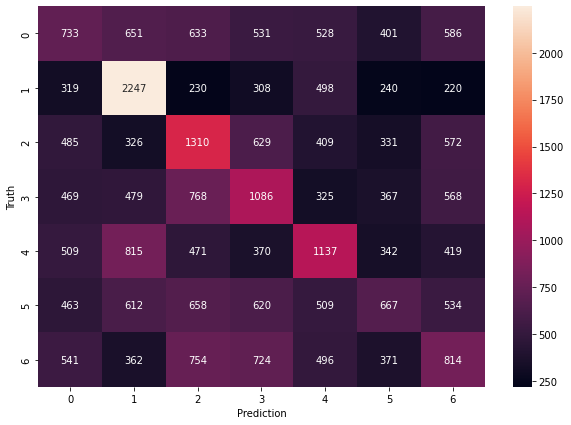

In [23]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')